In [1]:

import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
from PIL import Image

from settings import settings

/Users/kevywilly/Projects/felix-ai/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


********************************
*	Robot = felixMac
********************************

****************************************
*	Loading App Settings
****************************************



In [2]:
mean = 255.0 * np.array([0.485, 0.456, 0.406])
stdev = 255.0 * np.array([0.229, 0.224, 0.225])
normalize = torchvision.transforms.Normalize(mean, stdev)

In [3]:
model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=11, stride=2),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=11, stride=2),
    #nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2),
    nn.Conv2d(in_channels=64, out_channels=3, kernel_size=3, stride=1, padding=1)
)


In [4]:
def preprocess(image):
    image = cv2.resize(image, (224, 168), cv2.INTER_LINEAR)
    image = image[84:168, 0:224]
    image = image.transpose((2, 0, 1))
    t = torch.from_numpy(image.astype(np.float32))
    t = normalize(t)
    return t

In [5]:
def load_image(path):
    return np.array(Image.open(path))


In [6]:
def get_output(input):
    output = model.forward(input)
    img = output.detach().numpy()

    img = img.transpose((1, 2, 0))

    return img


In [7]:
def process_path(path):
    image = load_image(path)
    print(image.shape)
    plt.imshow(image)
    X = preprocess(image)
    out = get_output(X)
    plt.imshow(out)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1232, 1640, 3)


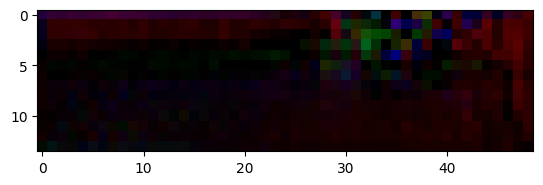

In [8]:

process_path(os.path.join(settings.TRAINING.data_root, "training/ternary/forward/1707973416-3244193.jpg"))



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1232, 1640, 3)


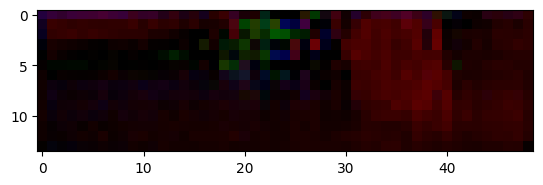

In [9]:
process_path(os.path.join(settings.TRAINING.data_root, "training/ternary/left/1707973411-826685.jpg"))

In [10]:
"""
convoluted = []
for filename in os.listdir(os.path.join(settings.TRAINING.data_root, "training/ternary/left")):
    path = os.path.join(settings.TRAINING.data_root, "training/ternary/left", filename)
    out_path = os.path.join(settings.TRAINING.data_root, "training/out", filename)
    image = load_image(path)
    X = preprocess(image)
    img = get_output(X)
    print(out_path)
    cv2.imwrite(out_path, img)
"""

'\nconvoluted = []\nfor filename in os.listdir(os.path.join(settings.TRAINING.data_root, "training/ternary/left")):\n    path = os.path.join(settings.TRAINING.data_root, "training/ternary/left", filename)\n    out_path = os.path.join(settings.TRAINING.data_root, "training/out", filename)\n    image = load_image(path)\n    X = preprocess(image)\n    img = get_output(X)\n    print(out_path)\n    cv2.imwrite(out_path, img)\n'